In [1]:
import torch
from portiloop_software.portiloop_python.ANN.lightning_tests import SleepStagingModel 
from portiloop_software.portiloop_python.ANN.data.sleepedf_data import get_sleepedf_loaders_keras

### Load the Pytorch model weights

In [2]:
config = {
        'batch_size': 64,
        'freq': 100,
        'inception': [16, 8, 16, 16, 32, 16],
        'lr': 1e-3,
        'num_heads': 8,
        'num_layers': 1,
        'noise_std': 0.1,
        'dropout': 0.1,
        'cls': False,
        'window_size': 30 * 100,
        'seq_len': 1,
    }

model_test = SleepStagingModel(config, [])
model_test.load_state_dict(torch.load('/home/ubuntu/portiloop-training/TSN_again_1688500831-epoch=02-f1=0.71.ckpt')['state_dict'])

/home/ubuntu/anaconda3/envs/portiloop-training/lib/python3.11/site-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


<All keys matched successfully>

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, ReLU, MaxPooling1D, Dropout, LSTM, Dense, Softmax

def TinySleepNet(fs):
    input_shape = (30 * fs, 1)
    inputs = Input(shape=input_shape)

    x = Conv1D(128, 16, strides=4)(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling1D(pool_size=8, strides=8)(x)
    x = Dropout(0.5)(x)

    x = Conv1D(128, 8, 1)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv1D(128, 8, 1)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv1D(128, 8, 1)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling1D(pool_size=4, strides=4)(x)
    x = Dropout(0.5)(x)

    x = LSTM(64, name='embedding')(x)
    x = ReLU()(x)

    outputs = Dense(5)(x)
    outputs = Softmax()(outputs)

    model = Model(inputs=inputs, outputs=outputs)
    return model

2023-07-05 19:39:03.203771: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
train_loader, test_loader = get_sleepedf_loaders_keras(82, config)

: 

: 

In [77]:
model = TinySleepNet(100)
optim = tf.keras.optimizers.AdamW(learning_rate=1e-3)
model.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy']) # , 'f1_score', 'precision', 'recall'

2023-07-05 19:54:14.771246: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-05 19:54:14.773043: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-05 19:54:14.774361: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

### Showing 1 line

(1, 3000, 1)


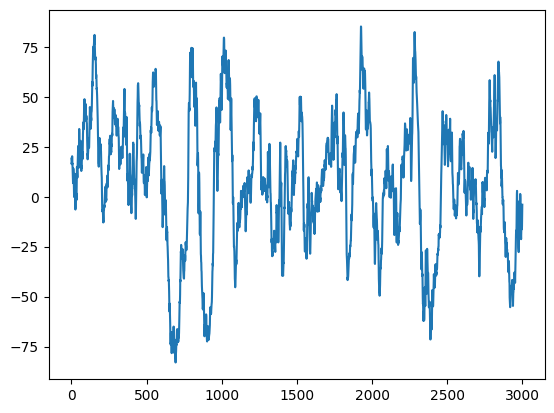

In [6]:
import matplotlib.pyplot as plt

print(next(train_loader)[0].shape)
plt.plot(next(train_loader)[0][0, :, 0])

### Training:

In [7]:
model.fit(train_loader, epochs=10, validation_data=test_loader, batch_size=64, verbose=1, steps_per_epoch=1000, validation_steps=1000)

2023-07-05 19:44:10.879532: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Epoch 1/10


2023-07-05 19:44:14.259962: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-05 19:44:14.261756: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-05 19:44:14.263683: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1000/1000 [==============================] - ETA: 0s - loss: 1.4691 - accuracy: 0.3660

2023-07-05 19:44:43.760327: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-07-05 19:44:44.192035: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-05 19:44:44.193747: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_gra

1000/1000 [==============================] - 35s 22ms/step - loss: 1.4691 - accuracy: 0.3660 - val_loss: 1.3603 - val_accuracy: 0.4290
Epoch 2/10
1000/1000 [==============================] - 22s 22ms/step - loss: 1.4417 - accuracy: 0.3390 - val_loss: 1.3486 - val_accuracy: 0.2850
Epoch 3/10
1000/1000 [==============================] - 21s 21ms/step - loss: 1.4232 - accuracy: 0.3720 - val_loss: 1.3317 - val_accuracy: 0.2910
Epoch 4/10
1000/1000 [==============================] - 22s 22ms/step - loss: 1.4573 - accuracy: 0.3530 - val_loss: 1.3799 - val_accuracy: 0.3090
Epoch 5/10
1000/1000 [==============================] - 20s 20ms/step - loss: 1.4388 - accuracy: 0.3700 - val_loss: 1.4045 - val_accuracy: 0.2800
Epoch 6/10
1000/1000 [==============================] - 22s 22ms/step - loss: 1.3983 - accuracy: 0.3740 - val_loss: 1.3606 - val_accuracy: 0.4580
Epoch 7/10
1000/1000 [==============================] - 22s 22ms/step - loss: 1.4404 - accuracy: 0.3560 - val_loss: 1.4444 - val_accura

In [27]:
import numpy as np

In [76]:
test = next(train_loader)
preds = model.predict(test[0])
print(test[1])
np.argmax(preds, axis=1)

1/1 [==============================] - 0s 27ms/step
[4]


array([0])